In [1]:
# importing packages to do calculations & make matrices
import numpy as np
import scipy as sci
from scipy import sparse
from scipy.sparse import csc_matrix
from scipy.sparse import linalg
from scipy.sparse.linalg import spsolve
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

# Solving 2D Heat Equation Boundary Value Problem Using the Screened Poisson Equation

In [26]:
def Screened_Poisson_2D(lamb, N, f, gL, gR, gD, gU):
    
    # defining h
    h = 1/(N+1)

    # creating mesh 
    x = np.arange(h, 1-h+h, h)
    y = np.arange(h, 1-h+h, h)
    yy, xx = np.meshgrid(x, y)

    # setting up Identity matrix with speye
    I = sparse.eye(N)
    # creating S from spdiags
    S = sparse.diags([1,-2, 1], [-1, 0, 1], shape = (N, N))
    # creating L from I and S using kron
    L = sci.sparse.kron(I, S) + sci.sparse.kron(S, I)
    
    # creating I diagonal matrix N^2 x N^2
    II = sparse.eye(N*N)
    # multiplying values in A equation
    A = (lamb*II-((1/h**2)*L))
    print(A.A)

    # modifying boundary values
    for iy in range(N):
        f[0][iy] = f[0][iy] + 1/(h**2)*gL(y[iy])
        f[N-1][iy] = f[N-1][iy] + 1/(h**2)*gR(y[iy]) 

    # modifying boundary values
    for ix in range(N):
        f[ix][0] = f[ix][0] + 1/(h**2)*gD(np.pi*(x[ix]))
        f[ix][N-1] = f[ix][N-1] + 1/(h**2)*gU(np.pi*(x[ix]))
        
    # reshaping f to vector
    f = np.reshape(f, N*N)
    # solving for U

    U = sparse.linalg.spsolve(csc_matrix(A), f)
    # reshaping U to matrix
    U = U.reshape(N, N)
    
    # returning meshes
    mat1 = xx
    mat2 = yy
    
    return [U, mat1, mat2]

In [27]:
# identifying parameters to run the function
lamb = 2
N = 4
func = lambda x, y: np.multiply((2+(2*(np.pi**2)))*np.sin(np.pi*x),np.cos(np.pi*y))

h = 1/(N+1)

# creating mesh 
x = np.arange(h, 1-h+h, h)
y = np.arange(h, 1-h+h, h)
print(x)
yy, xx = np.meshgrid(x, y)

# creating matrix evaluated at function for each point
f = np.array(func(xx, yy))

# functions affecting y
gL = lambda z: 0
gR = lambda z: 0

# functions affecting x
gD = lambda z: np.sin(z)
gU = lambda z: -np.sin(z)

# running function
sol, mat1, mat2 = Screened_Poisson_2D(lamb, N, f, gL, gR, gD, gU)

# solution
print(sol)
print(mat1)

[0.2 0.4 0.6 0.8]
[[102. -25.   0.   0. -25.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.]
 [-25. 102. -25.   0.   0. -25.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.]
 [  0. -25. 102. -25.   0.   0. -25.   0.   0.   0.   0.   0.   0.   0.
    0.   0.]
 [  0.   0. -25. 102.   0.   0.   0. -25.   0.   0.   0.   0.   0.   0.
    0.   0.]
 [-25.   0.   0.   0. 102. -25.   0.   0. -25.   0.   0.   0.   0.   0.
    0.   0.]
 [  0. -25.   0.   0. -25. 102. -25.   0.   0. -25.   0.   0.   0.   0.
    0.   0.]
 [  0.   0. -25.   0.   0. -25. 102. -25.   0.   0. -25.   0.   0.   0.
    0.   0.]
 [  0.   0.   0. -25.   0.   0. -25. 102.   0.   0.   0. -25.   0.   0.
    0.   0.]
 [  0.   0.   0.   0. -25.   0.   0.   0. 102. -25.   0.   0. -25.   0.
    0.   0.]
 [  0.   0.   0.   0.   0. -25.   0.   0. -25. 102. -25.   0.   0. -25.
    0.   0.]
 [  0.   0.   0.   0.   0.   0. -25.   0.   0. -25. 102. -25.   0.   0.
  -25.   0.]
 [  0.   0.   0.   0.   0.   0.   0. -25.   0. 

In [4]:
# exact solution

# setting up variables
N = 4
h = 1/(N+1)

# using h to make arrays
x = np.arange(h, 1-h+h, h)
y = np.arange(h, 1-h+h, h)
# arrays into meshgrid
yy, xx = np.meshgrid(x, y)

# solution comes from plugging meshgrids into the exact equation
fxy = np.multiply((np.sin(np.pi*xx)),(np.cos(np.pi*yy)))

# printing exact solution
print(fxy)

[[ 0.47552826  0.18163563 -0.18163563 -0.47552826]
 [ 0.76942088  0.29389263 -0.29389263 -0.76942088]
 [ 0.76942088  0.29389263 -0.29389263 -0.76942088]
 [ 0.47552826  0.18163563 -0.18163563 -0.47552826]]


In [5]:
# repeating above process for each value of N
N = 4
h = 1/(N+1)

x = np.arange(h, 1-h+h, h)
y = np.arange(h, 1-h+h, h)
yy, xx = np.meshgrid(x, y)

func = lambda x, y: np.multiply((2+(2*(np.pi**2)))*np.sin(np.pi*x),np.cos(np.pi*y))
f = np.array(func(xx, yy))

fxy = np.multiply(np.sin(np.pi*xx),np.cos(np.pi*yy))

sol1, x, y = Screened_Poisson_2D(lamb, N, f, gL, gR, gD, gU)

# calculating error 
err1 = abs(sol1 - fxy)/fxy

In [6]:
# repeating above process for each value of N
N = 8
h = 1/(N+1)

x = np.arange(h, 1-h+h, h)
y = np.arange(h, 1-h+h, h)
yy, xx = np.meshgrid(x, y)

func = lambda x, y: np.multiply((2+(2*(np.pi**2)))*np.sin(np.pi*x),np.cos(np.pi*y))
f = np.array(func(xx, yy))

fxy = np.sin(np.pi*xx)*np.cos(np.pi*yy)
sol2, mat1, mat2 = Screened_Poisson_2D(lamb, N, f, gL, gR, gD, gU)
err2 = abs(sol2 - fxy)/fxy

In [7]:
# repeating above process for each value of N
N = 16
h = 1/(N+1)

x = np.arange(h, 1-h+h, h)
y = np.arange(h, 1-h+h, h)
yy, xx = np.meshgrid(x, y)

func = lambda x, y: np.multiply((2+(2*(np.pi**2)))*np.sin(np.pi*x),np.cos(np.pi*y))
f = np.array(func(xx, yy))

fxy = np.sin(np.pi*xx)*np.cos(np.pi*yy)

sol3, mat1, mat2 = Screened_Poisson_2D(lamb, N, f, gL, gR, gD, gU)
err3 = abs(sol3 - fxy)/fxy

In [8]:
# repeating above process for each value of N
N = 32
h = 1/(N+1)

x = np.arange(h, 1-h+h, h)
y = np.arange(h, 1-h+h, h)
yy, xx = np.meshgrid(x, y)

func = lambda x, y: np.multiply((2+(2*(np.pi**2)))*np.sin(np.pi*x),np.cos(np.pi*y))
f = np.array(func(xx, yy))

fxy = np.sin(np.pi*xx)*np.cos(np.pi*yy)

sol4, mat1, mat2 = Screened_Poisson_2D(lamb, N, f, gL, gR, gD, gU)
err4 = abs(sol4 - fxy)/fxy

In [9]:
# repeating above process for each value of N
N = 64
h = 1/(N+1)

x = np.arange(h, 1-h+h, h)
y = np.arange(h, 1-h+h, h)
yy, xx = np.meshgrid(x, y)

func = lambda x, y: np.multiply((2+(2*(np.pi**2)))*np.sin(np.pi*x),np.cos(np.pi*y))
f = np.array(func(xx, yy))

fxy = np.sin(np.pi*xx)*np.cos(np.pi*yy)

sol5, mat1, mat2 = Screened_Poisson_2D(lamb, N, f, gL, gR, gD, gU)
err5 = abs(sol5 - fxy)/fxy

In [10]:
# repeating above process for each value of N
N = 128
h = 1/(N+1)

x = np.arange(h, 1-h+h, h)
y = np.arange(h, 1-h+h, h)
yy, xx = np.meshgrid(x, y)

func = lambda x, y: np.multiply((2+(2*(np.pi**2)))*np.sin(np.pi*x),np.cos(np.pi*y))
f = np.array(func(xx, yy))

fxy = np.sin(np.pi*xx)*np.cos(np.pi*yy)

sol6, mat1, mat2 = Screened_Poisson_2D(lamb, N, f, gL, gR, gD, gU)
err6 = abs(fxy - sol6)/(fxy)

In [11]:
# repeating above process for each value of N
N = 256
h = 1/(N+1)

x = np.arange(h, 1-h+h, h)
y = np.arange(h, 1-h+h, h)
yy, xx = np.meshgrid(x, y)

func = lambda x, y: np.multiply((2+(2*(np.pi**2)))*np.sin(np.pi*x),np.cos(np.pi*y))
f = np.array(func(xx, yy))

fxy = np.sin(np.pi*xx)*np.cos(np.pi*yy)

sol7, mat1, mat2 = Screened_Poisson_2D(lamb, N, f, gL, gR, gD, gU)
err7 = abs(fxy - sol7)/(fxy)

In [12]:
# repeating above process for each value of N
N = 512
h = 1/(N+1)

x = np.arange(h, 1-h+h, h)
y = np.arange(h, 1-h+h, h)
yy, xx = np.meshgrid(x, y)

func = lambda x, y: np.multiply((2+(2*(np.pi**2)))*np.sin(np.pi*x),np.cos(np.pi*y))
f = np.array(func(xx, yy))

fxy = np.sin(np.pi*xx)*np.cos(np.pi*yy)

sol8, mat1, mat2 = Screened_Poisson_2D(lamb, N, f, gL, gR, gD, gU)
err8 = abs(fxy - sol8)/(fxy)

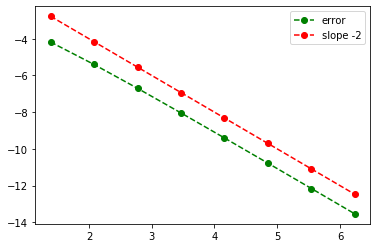

In [18]:
# importing package to process l2 norm
from numpy import linalg as LA
# defining all N values to loop
N = [4, 8, 16, 32, 64, 128, 256, 512]

# putting errors into one list
errors = [err1, err2, err3, err4, err5, err6, err7, err8]

# calulating norm for the error at each N
l2norm = [LA.norm(i) for i in errors]
# dividing by N as in instructions
l2norm = [l2norm[i]/N[i] for i in range(len(N))]

# plotting norms and line of -2
plt.plot(np.log(N), np.log(l2norm), '--go')
plt.plot(np.log(N), -2*np.log(N), '--ro')

# labeling each line
plt.legend(['error', 'slope -2'])
# showing plot
plt.show()

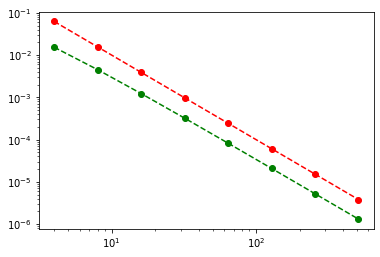

In [19]:
plt.loglog(N, l2norm, '--go')
plt.loglog(N, 1/np.array(N)**2, '--ro')

# Solve Initial Boundary Value Problem By Discretizing In Time And Solving a BVP At Each Step

In [145]:
def Heat_Equation_2D(D, dt, M, N, u0):
    
    # calculating lambda using D and dt
    lamb = 1/(D*dt)
    
    # boundary conditions
    gL = lambda z: 0
    gR = lambda z: 0
    gD = lambda z: 0
    gU = lambda z: 0
    
    # calculating h for meshgrid
    h = 1/(N+1)
    
    # lists for meshgrid
    x = np.arange(h, 1-h+h, h)
    y = np.arange(h, 1-h+h, h)
    # computing meshgrid
    yy, xx = np.meshgrid(x, y)
    
    # evaluating meshgrid points in function u0
    f = np.array(u0(xx, yy))
    
    # list of times from 0 to 1
    times = np.arange(0, 1+dt, dt)
    
    # empty list appended to later in loop
    tensor = []
    
    # running screened poisson for initial time
    sol, x, y = Screened_Poisson_2D(lamb, N, f, gL, gR, gD, gU)
    
    # appending solution to the list to be used later
    tensor.append(sol*lamb)

    for i in range(0, len(times)-1):
        # calculating lambda using D and dt
        lamb = 1/(D*dt)
        # using last solution * lambda as rhs
        f = lamb*tensor[i]
        # running function to find solution
        sol, x, y = Screened_Poisson_2D(lamb, N, f, gL, gR, gD, gU)
        # adding it to list to be used in next iteration through loop
        tensor.append(sol)

    # returning four required variables
    return [xx, yy, times, tensor]

In [160]:
# defining variables
D = 0.1
dt = 0.01
M = 100
N = 64
u0 = lambda xx, yy: np.multiply((np.sin(np.pi*xx)),(np.sin(np.pi*yy)))
x, y, times, sol = Heat_Equation_2D(D, dt, M, N, u0)

# checking shape of solution
print(np.shape(sol))

(101, 64, 64)


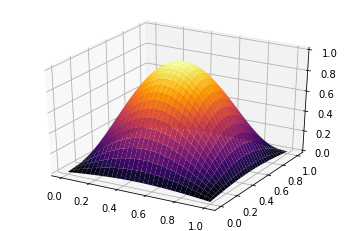

In [161]:
# setting up surface plot configurations
fig = plt.figure()
ax = fig.gca(projection='3d')

# calculating/ defining variables
N = 64
h = 1/(N+1)

# setting up meshgrid
x = np.linspace(0, 1, N)
y = np.linspace(0, 1, N)
yy, xx = np.meshgrid(x, y)

# using t*100 for index
t = 0.0
index = int(t*M)

# changing zlimit to [0,1]
ax.set_zlim(0, 1)

# plotting the 3d plot with inferno colormap
surf = ax.plot_surface(xx, yy, sol[index], cmap=cm.inferno)

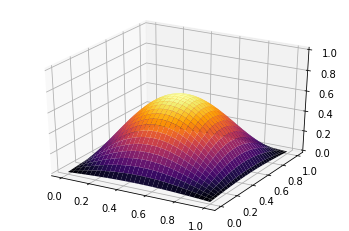

In [162]:
# repeating above steps for other t values
fig = plt.figure()
ax = fig.gca(projection='3d')

t = 0.2
index = int(t*M)

ax.set_zlim(0, 1)

surf = ax.plot_surface(xx, yy, sol[index], cmap=cm.inferno)

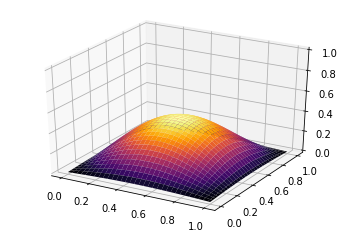

In [163]:
# repeating above steps for other t values
fig = plt.figure()
ax = fig.gca(projection='3d')
t = 0.4
index = int(t*M)

ax.set_zlim(0, 1)

surf = ax.plot_surface(xx, yy, sol[index], cmap=cm.inferno)

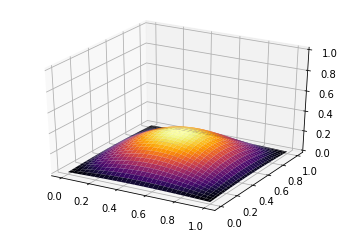

In [164]:
# repeating above steps for other t values
fig = plt.figure()
ax = fig.gca(projection='3d')
t = 0.6
index = int(t*M)

ax.set_zlim(0, 1)

surf = ax.plot_surface(xx, yy, sol[index], cmap=cm.inferno)

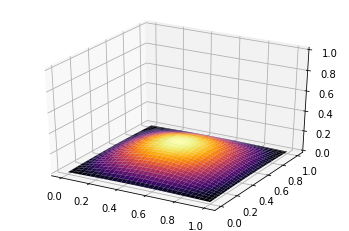

In [165]:
# repeating above steps for other t values
fig = plt.figure()
ax = fig.gca(projection='3d')

t = 0.8
index = int(t*M)

ax.set_zlim(0, 1)

surf = ax.plot_surface(xx, yy, sol[index], cmap=cm.inferno)

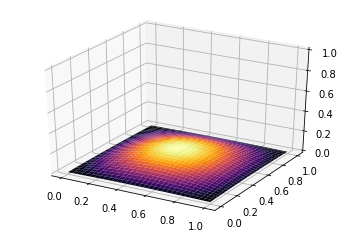

In [166]:
# repeating above steps for other t values
fig = plt.figure()
ax = fig.gca(projection='3d')

t = 1
index = int(t*M)
ax.set_zlim(0, 1)

surf = ax.plot_surface(xx, yy, sol[index], cmap=cm.inferno)

2D heat equation solver


MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


Done!


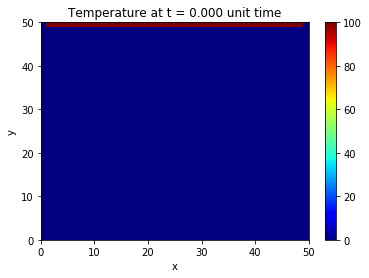

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation

print("2D heat equation solver")

plate_length = 50
max_iter_time = 750

alpha = 2
delta_x = 1

delta_t = (delta_x ** 2)/(4 * alpha)
gamma = (alpha * delta_t) / (delta_x ** 2)

# Initialize solution: the grid of u(k, i, j)
u = np.empty((max_iter_time, plate_length, plate_length))

# Initial condition everywhere inside the grid
u_initial = 0

# Boundary conditions
u_top = 100.0
u_left = 0.0
u_bottom = 0.0
u_right = 0.0

# Set the initial condition
u.fill(u_initial)

# Set the boundary conditions
u[:, (plate_length-1):, :] = u_top
u[:, :, :1] = u_left
u[:, :1, 1:] = u_bottom
u[:, :, (plate_length-1):] = u_right

def calculate(u):
    for k in range(0, max_iter_time-1, 1):
        for i in range(1, plate_length-1, delta_x):
            for j in range(1, plate_length-1, delta_x):
                u[k + 1, i, j] = gamma * (u[k][i+1][j] + u[k][i-1][j] + u[k][i][j+1] + u[k][i][j-1] - 4*u[k][i][j]) + u[k][i][j]

    return u

def plotheatmap(u_k, k):
    # Clear the current plot figure
    plt.clf()

    plt.title(f"Temperature at t = {k*delta_t:.3f} unit time")
    plt.xlabel("x")
    plt.ylabel("y")

    # This is to plot u_k (u at time-step k)
    plt.pcolormesh(u_k, cmap=plt.cm.jet, vmin=0, vmax=100)
    plt.colorbar()

    return plt

# Do the calculation here
u = calculate(u)

def animate(k):
    plotheatmap(u[k], k)

anim = animation.FuncAnimation(plt.figure(), animate, interval=1, frames=max_iter_time, repeat=False)
anim.save("heat_equation_solution.gif")

print("Done!")